 <h1 style= 'color: green'><tb> House Prices - Advanced Regression Techniques</h1>
 
<br><br><br>


<img src="ml.PNG" width="800" height="700"><br><br><br><br><br>


# Table of Contents

 <h3 style= 'color: blue'>I- Introduction</h3>
 
 <h3 style= 'color: blue'>II- Data Visualization</h3>
     <ul>   
    <li><h5 style= 'color: blue'>1 info of each of the variables in our train set</h5></li>
    <li><h5 style= 'color: blue'>2- The statistical summary</h5></li>
   
  </ul>
  
 <h3 style= 'color: blue'>III- Data Analysis and Cleaninig</h3>
 <ul>   
   <li><tr><h4 style= 'color: blue'>1- Numerical features</h4>
     <ul>   
    <li><h5 style= 'color: blue'>1-1 the correlation matrix</h5></li>
    <li><h5 style= 'color: blue'>1-2 Relation with salePrice in train dataset</h5></li>
    <li><h5 style= 'color: blue'>1-3 Missing value in train dataset</h5></li>
    <li><h5 style= 'color: blue'>1-4 check the distribution of each imputed feature before and after imputation</h5></li>
    <li><h5 style= 'color: blue'>1-5 feature importance</h5></li>
    <li><h5 style= 'color: blue'>1-6 Missing value in Test dataset</h5></li>
    <li><h5 style= 'color: blue'>1-7 Normalisation of attributes</h5></li>
    </ul>
   </li>
    
    
    
   <li><h4 style= 'color: blue'>2- Categorical features</h4>
       <ul>   
         <li><h4 style= 'color: blue'>2-1. Explore and clean Categorical features</h4></li>
         <li><h4 style= 'color: blue'>2-2 Display nulls in train dataset</h4></li>
         <li><h4 style= 'color: blue'>2-3 Display nulls in test dataset</h4></li>
         <li><h4 style= 'color: blue'>2-4 Remove columns with more than 200 nulls in train and test dataset</h4></li>
         <li><h4 style= 'color: blue'>2-5 Display of test and train dataset after removing nulls</h4></li>
        <li><h4 style= 'color: blue'>2-6 Encoding</h4></li>
       </ul>
   </li>
   <li><h4 style= 'color: blue'>3- Join categorical features and numreical features</h4>
       <ul>   
         <li><h4 style= 'color: blue'>3-1 drop quasi-constant features where 70% of the values are similar or constant</h4>
         <li><h4 style= 'color: blue'>3-2 Join training dataset and test dataset</h4></li>
          <li><h4 style= 'color: blue'>3-3 Inspect Target Feature (SalePrice)</h4></li>
       </ul>
   </li>
</ul>
 
 <h3 style= 'color: blue'>IV- Preparing data for medeling</h3>
 
 <h3 style= 'color: blue'>V- Medeling</h3>
  <ul>   
    <li><h4 style= 'color: blue'>1- Random forestRegressor</h4>
    <li><h4 style= 'color: blue'>2- Regression linear</h4></li>
    <li><h4 style= 'color: blue'>3- Lasso Regression</h4></li>
    <li><h4 style= 'color: blue'>4- XGB Regressor</h4></li>
    <li><h4 style= 'color: blue'>5- SVR :Support Vector Regression</h4></li> 
  </ul>
  
 
 
 <h3 style= 'color: blue'>VI- Choosing the best model</h3>
 
 <h3 style= 'color: blue'>VII-  verification of existance of overfiting or underfiting</h3>
 
 <h3 style= 'color: blue'>VII- Submission</h3>


</n>


 <h1 style= 'color: green'>I- Introduction</h1>

For this project, the house prices from the Ames Housing test dataset will be predicted. There are two datasets that will be imported from the competition:

- Training dataset "train.csv" for whom the Supervised Learning Models will be trained upon

- Test dataset "test.csv" where the house prices will be predicted.

 <h1 style= 'color: green'>II- Data Visualization</h1>


In [95]:
# Load librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve,ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import KFold
import joblib

In [96]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1-1 info of each of the variables in our train set


In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2- The statistical summary

In [98]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [99]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()

df_test.drop(["Id"], axis=1, inplace=True)

 <h1 style= 'color: green'>III- Data Analysis and Cleaninig</h1>

 <h2 style= 'color: red'>1- Numerical features</h2>

In [100]:
# Let's select the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])

# 1-1 the correlation matrix

<h3>the correlation matrix does not consider null values</h3>

<AxesSubplot:>

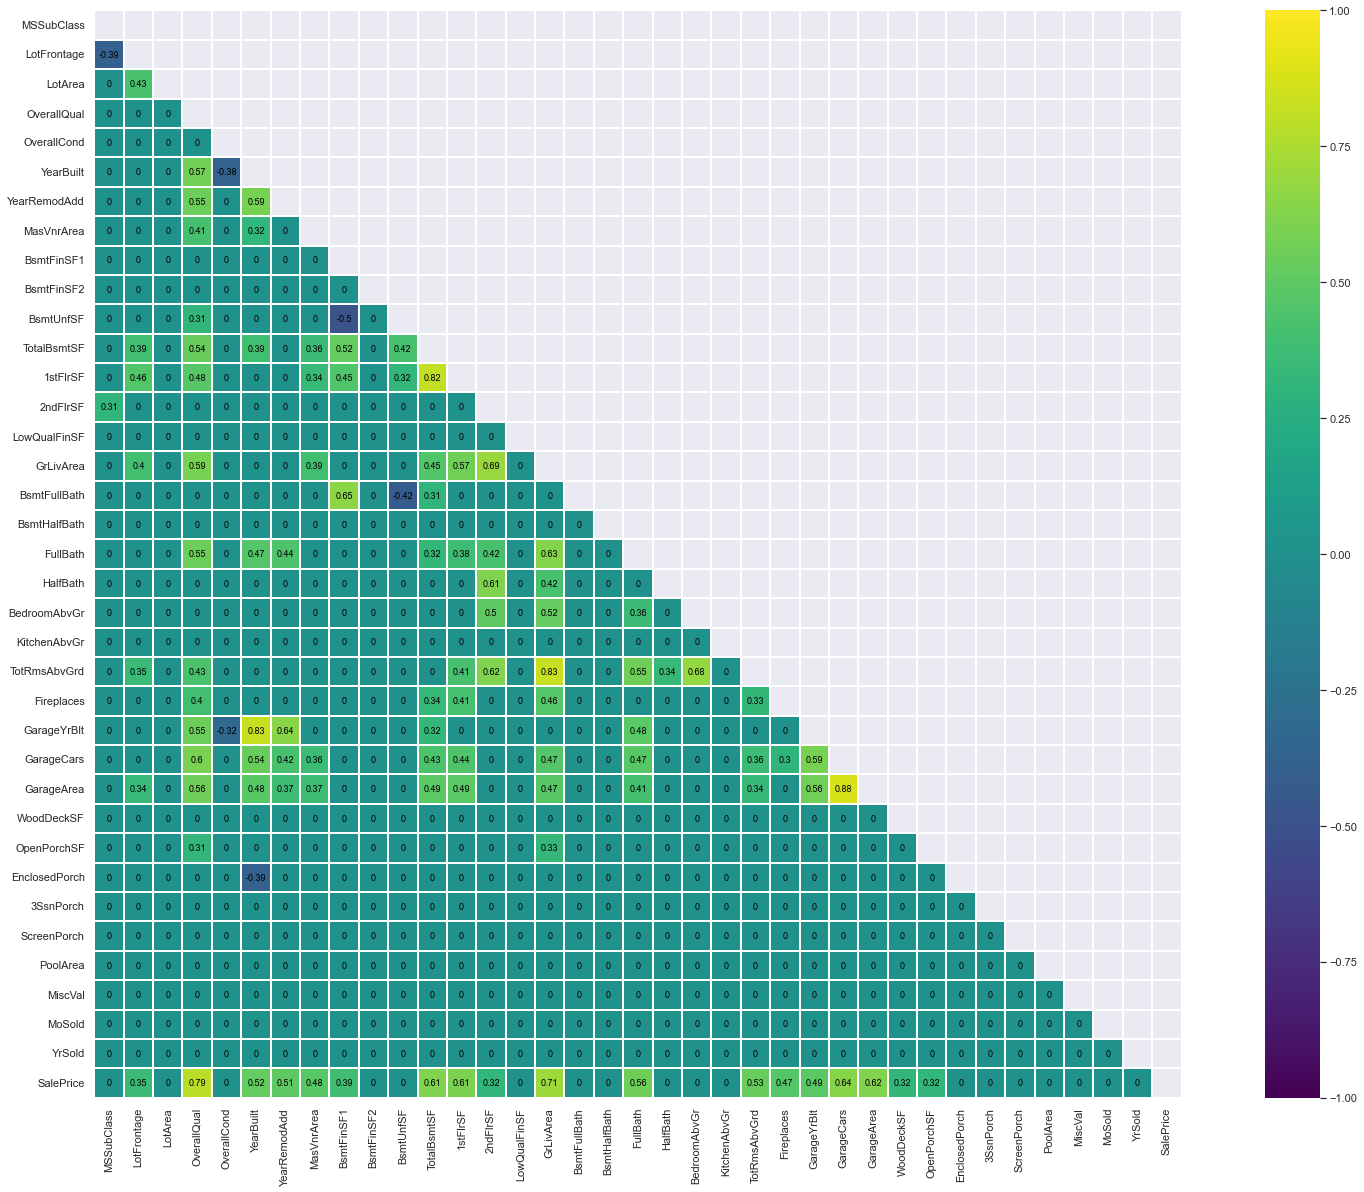

In [101]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_train_num.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"
plt.figure(figsize = (30,20))
# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

faeature that have correlation between them more than 0.7 

In [102]:
corr_matrix = df_train_num.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.7]

C:\Users\Dell\AppData\Local\Temp/ipykernel_13632/1198977606.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,,corr
GarageCars,GarageArea,0.88
YearBuilt,GarageYrBlt,0.83
GrLivArea,TotRmsAbvGrd,0.83
TotalBsmtSF,1stFlrSF,0.82
OverallQual,SalePrice,0.79
GrLivArea,SalePrice,0.71


we will take that in concideration when deleting features, because if we have correlation between tow features we shold remove one of them so we need more infomation to know what is the faeture to delete

# 1-2  Relation with salePrice in train dataset

# <h1 style= 'color: red'>Remark:</h1> 

the features that are correlated with salePrice, they will help us to make the prediction

In [103]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(
    df_num_corr) >= 0.5].sort_values(ascending=False)
print(
    f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0 < r2 < 0.3)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(
    f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


# <h1 style= 'color: red'>Remark:</h1> 

we will leave as numerical values in our dataset those which have the relationship with saleprice

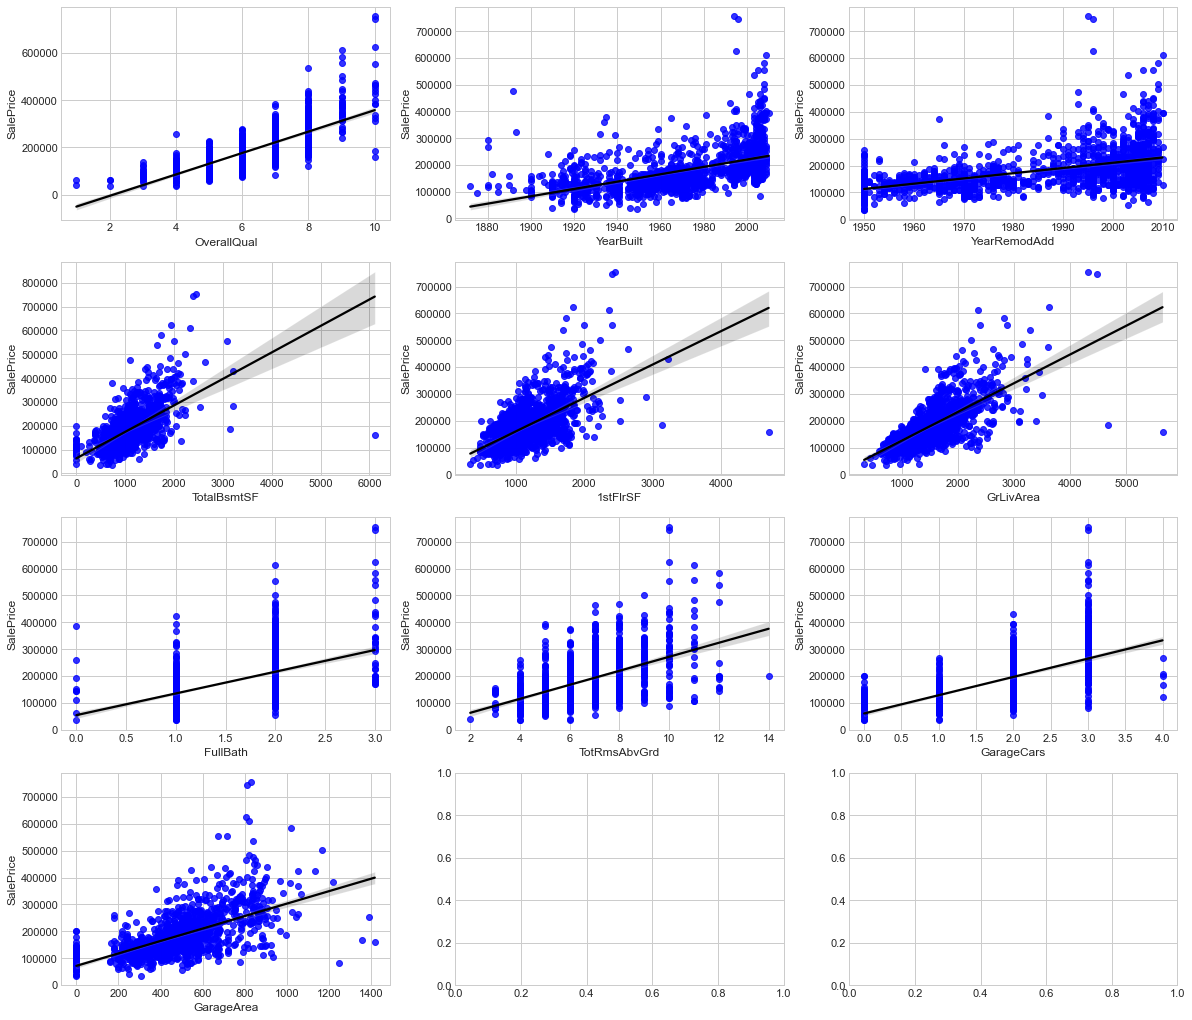

In [104]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "black"})

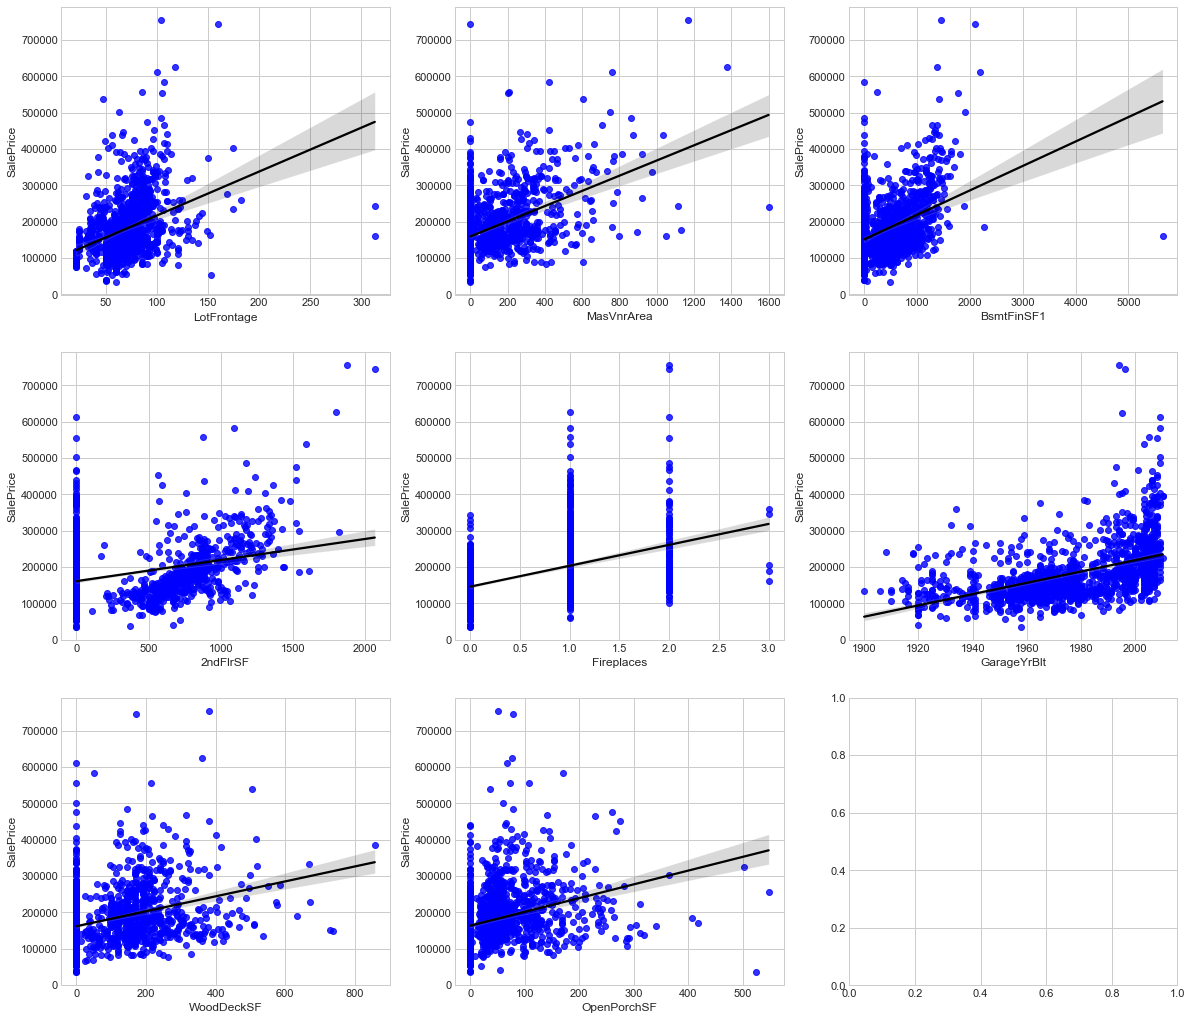

In [105]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(x=low_features[i], y="SalePrice", data=df_low_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "black"},)

In [106]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]
df_train_num.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,65.00,196.00,706,854,0,"2,003.00",0,61,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,80.00,0.00,978,0,1,"1,976.00",298,0,181500
2,7,2001,2002,920,920,1786,2,6,2,608,68.00,162.00,486,866,1,"2,001.00",0,42,223500
3,7,1915,1970,756,961,1717,1,7,3,642,60.00,0.00,216,756,1,"1,998.00",0,35,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,84.00,350.00,655,1053,1,"2,000.00",192,84,250000


# 1-3  Missing value in train dataset

Text(0, 0.5, 'Column Name\n')

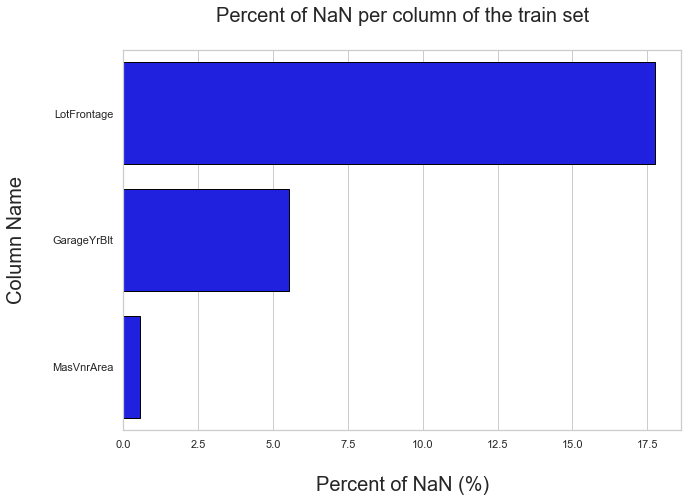

In [107]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="blue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Imputation of missing values

In [108]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

# 1-4 check the distribution of each imputed feature before and after imputation


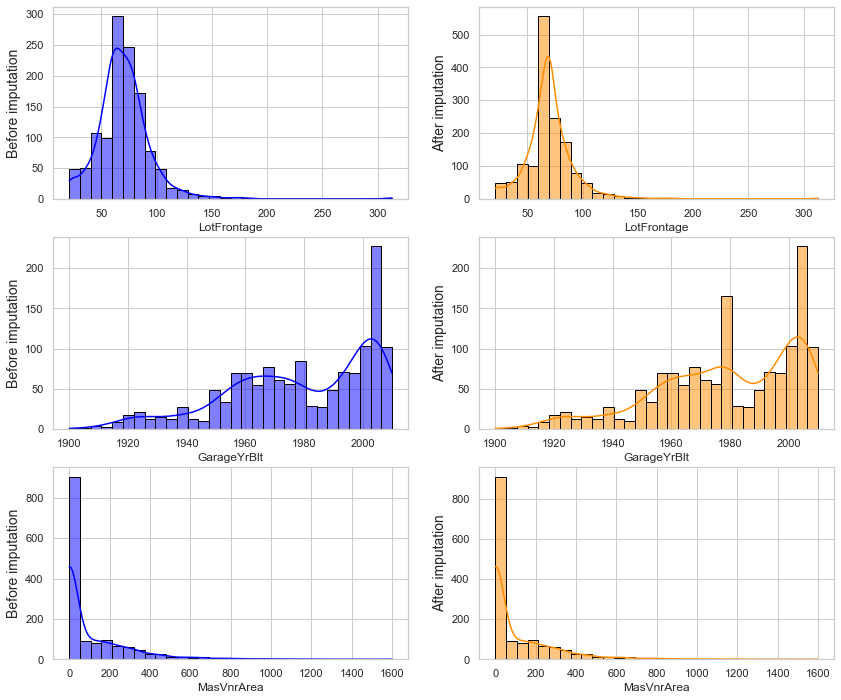

In [109]:

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="blue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

For "LotFrontage" and "GarageYrBlt" the distributions have changed after imputations. There is an over-representation of the median class compare ot the original distribution. However, the distribution remains the same for "MasVnrArea". Thus, to avoid any error related to the imputation I keep only the feature "MasVnrArea" for my analyses.

In [110]:
# Drop 'LotFrontage' and 'GarageYrBlt'
df_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"


# 1-5 feature importance

In [111]:
column_name = []


for i in df_train_imputed:
    column_name.append(i)
print(column_name)

array = df_train_imputed.values
X = array[:,0:15]
Y = array[:,16]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
[0.05534554 0.08836714 0.08468272 0.09210299 0.09247075 0.09409185
 0.01946903 0.06256515 0.02724495 0.09254391 0.0565819  0.08449353
 0.05084089 0.03336021 0.06583943]


using the feature importance method and finds that GrLivArea is the most important attribute, after we have 1stFlrSF and totalBsmtSF and GrageArea, we have already shown that these attributes have a high correlation with the salePrice attribute.

#   1-6 Missing value in Test dataset
The columns that have been deleted in the train set must also be deleted in the test set so that the two data sets remain identical for the modeling and prediction.

In [112]:
# Drop the same features from test set as for the train set
df_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

Text(0, 0.5, 'Column Name\n')

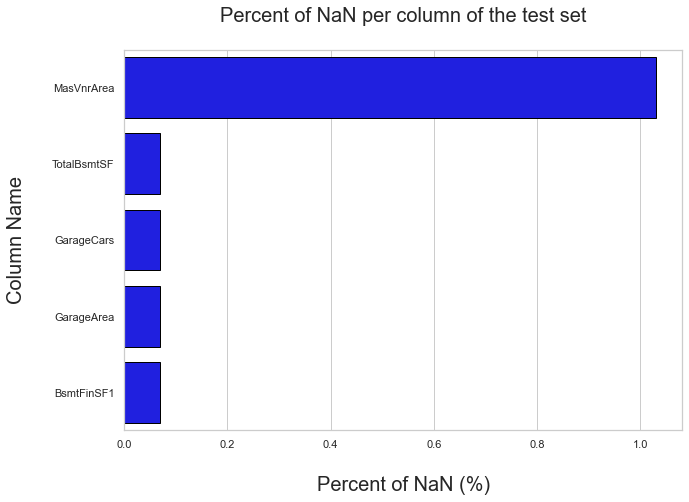

In [113]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="blue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Imputation in test dataset

In [114]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns


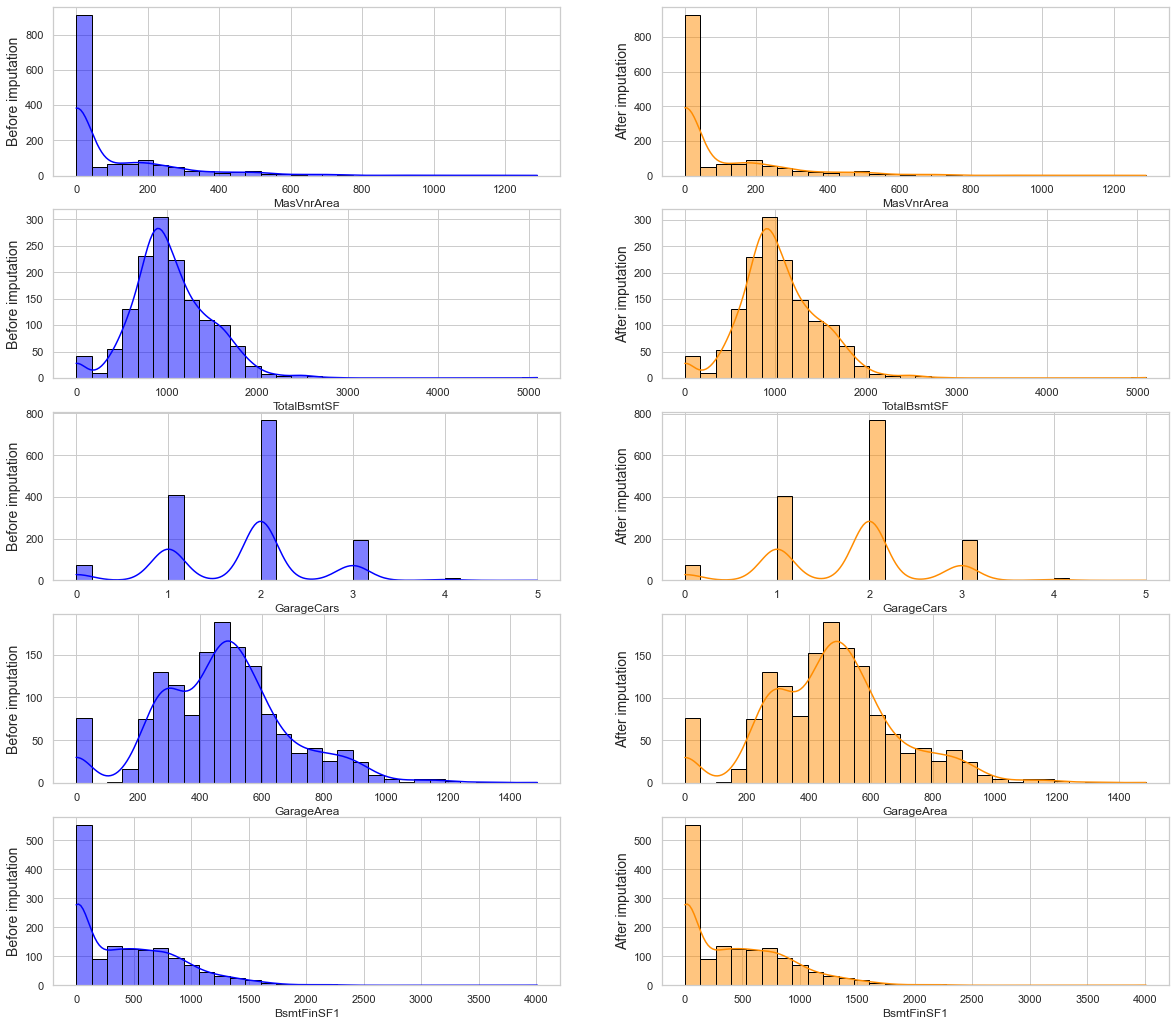

In [115]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="blue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

The percentage of NaN in each of these fetaures did not exceed 1.5%. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation.

# 6-3 Normalisation of attributes

In [116]:
scaler = StandardScaler()

#train
print(scaler.fit(df_train_imputed.iloc[:,0:16]))
print(scaler.mean_)
df_train_imputed.iloc[:,0:16]=scaler.transform(df_train_imputed.iloc[:,0:16])
# test
scaler.fit(df_test_imputed)
print(scaler.mean_)
df_test_imputed=scaler.transform(df_test_imputed)



StandardScaler()
[6.09931507e+00 1.97126781e+03 1.98486575e+03 1.05742945e+03
 1.16262671e+03 1.51546370e+03 1.56506849e+00 6.51780822e+00
 1.76712329e+00 4.72980137e+02 1.03117123e+02 4.43639726e+02
 3.46992466e+02 6.13013699e-01 9.42445205e+01 4.66602740e+01]
[6.07882111e+00 1.97135778e+03 1.98366278e+03 1.04607814e+03
 1.15653461e+03 1.48604592e+03 1.57093900e+00 6.38519534e+00
 1.76627827e+00 4.72773818e+02 9.96737491e+01 4.39142906e+02
 3.25967786e+02 5.81220014e-01 9.31747772e+01 4.83139136e+01]


In [117]:
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,0.65,1.05,0.88,-0.46,-0.79,0.37,0.79,0.91,0.31,0.35,0.51,0.58,1.16,-0.95,-0.75,0.22,"208,500.00"
1,-0.07,0.16,-0.43,0.47,0.26,-0.48,0.79,-0.32,0.31,-0.06,-0.57,1.17,-0.80,0.60,1.63,-0.70,"181,500.00"
2,0.65,0.98,0.83,-0.31,-0.63,0.52,0.79,-0.32,0.31,0.63,0.33,0.09,1.19,0.60,-0.75,-0.07,"223,500.00"
3,0.65,-1.86,-0.72,-0.69,-0.52,0.38,-1.03,0.30,1.65,0.79,-0.57,-0.50,0.94,0.60,-0.75,-0.18,"140,000.00"
4,1.37,0.95,0.73,0.20,-0.05,1.30,0.79,1.53,1.65,1.70,1.37,0.46,1.62,0.60,0.78,0.56,"250,000.00"


In [118]:
names = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSSF']


In [119]:
 pd.DataFrame(df_test_imputed, columns = names).head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSSF
0,-0.75,-0.34,-1.07,-0.37,-0.65,-1.22,-1.03,-0.92,-0.99,1.19,-0.56,0.06,-0.78,-0.90,0.37,-0.70
1,-0.05,-0.44,-1.21,0.64,0.43,-0.32,-1.03,-0.26,-0.99,-0.74,0.05,1.06,-0.78,-0.90,2.35,-0.18
2,-0.75,0.84,0.68,-0.27,-0.57,0.29,0.77,-0.26,0.30,0.04,-0.56,0.77,0.89,0.65,0.93,-0.21
3,-0.05,0.88,0.68,-0.27,-0.58,0.24,0.77,0.41,0.30,-0.01,-0.45,0.36,0.84,0.65,2.09,-0.18
4,1.34,0.68,0.39,0.53,0.31,-0.42,0.77,-0.92,0.30,0.15,-0.56,-0.39,-0.78,-0.90,-0.73,0.49



 <h2 style= 'color: red'>2- Categorical features</h2>

## 2-1. Explore and clean Categorical features

In [120]:
cat =[
    i for i in df_train.columns if df_train.dtypes[i] == "object"]
# test dataset
df_test_cat = df_test[cat]
# train dataset

df_train_cat = df_train[cat]
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

show value of featues

In [121]:
s = []
i = 0
for k in df_train_cat.select_dtypes(include=["object"]):
    print(k, df_train_cat[k].unique())

    s.append(df_train_cat[k].unique())
    for j in s:
        for m in j:
           # print(m)
            
            s=[]
#d = {1: 'red', 2: 'orange', 3: 'yellow'}
#lst = [d[k] for k in lst]

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [122]:
# count value
for k in df_train_cat:
    print(df_train_cat[k].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

<h3> 2-2 Display nulls in train dataset</h3>

Total columns with null:
16
Total null values:
6617


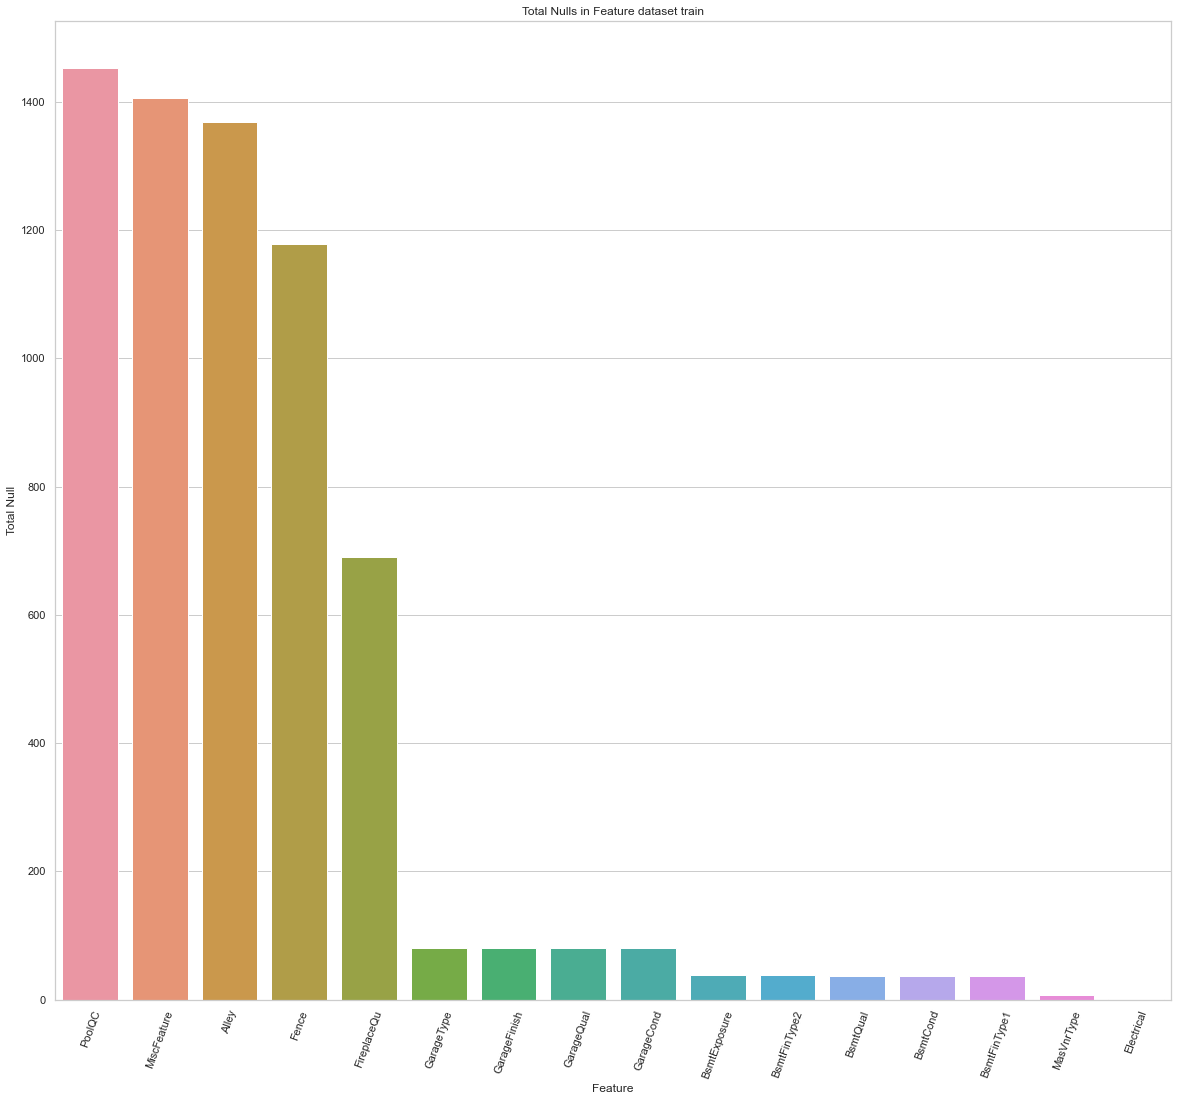

In [123]:
null_list = []
for col in df_train_cat.columns:
    null = df_train_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 
print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
sns.set_palette(sns.color_palette("tab10"))
sns.barplot(data=null_df.sort_values(by='Total Null',ascending = False).head(19), x='Feature',y='Total Null')
plt.xticks(rotation = 70)
plt.title("Total Nulls in Feature dataset train")
plt.show()

<h3>2-3 Display nulls in test dataset</h3>

Total columns with null:
22
Total null values:
6670


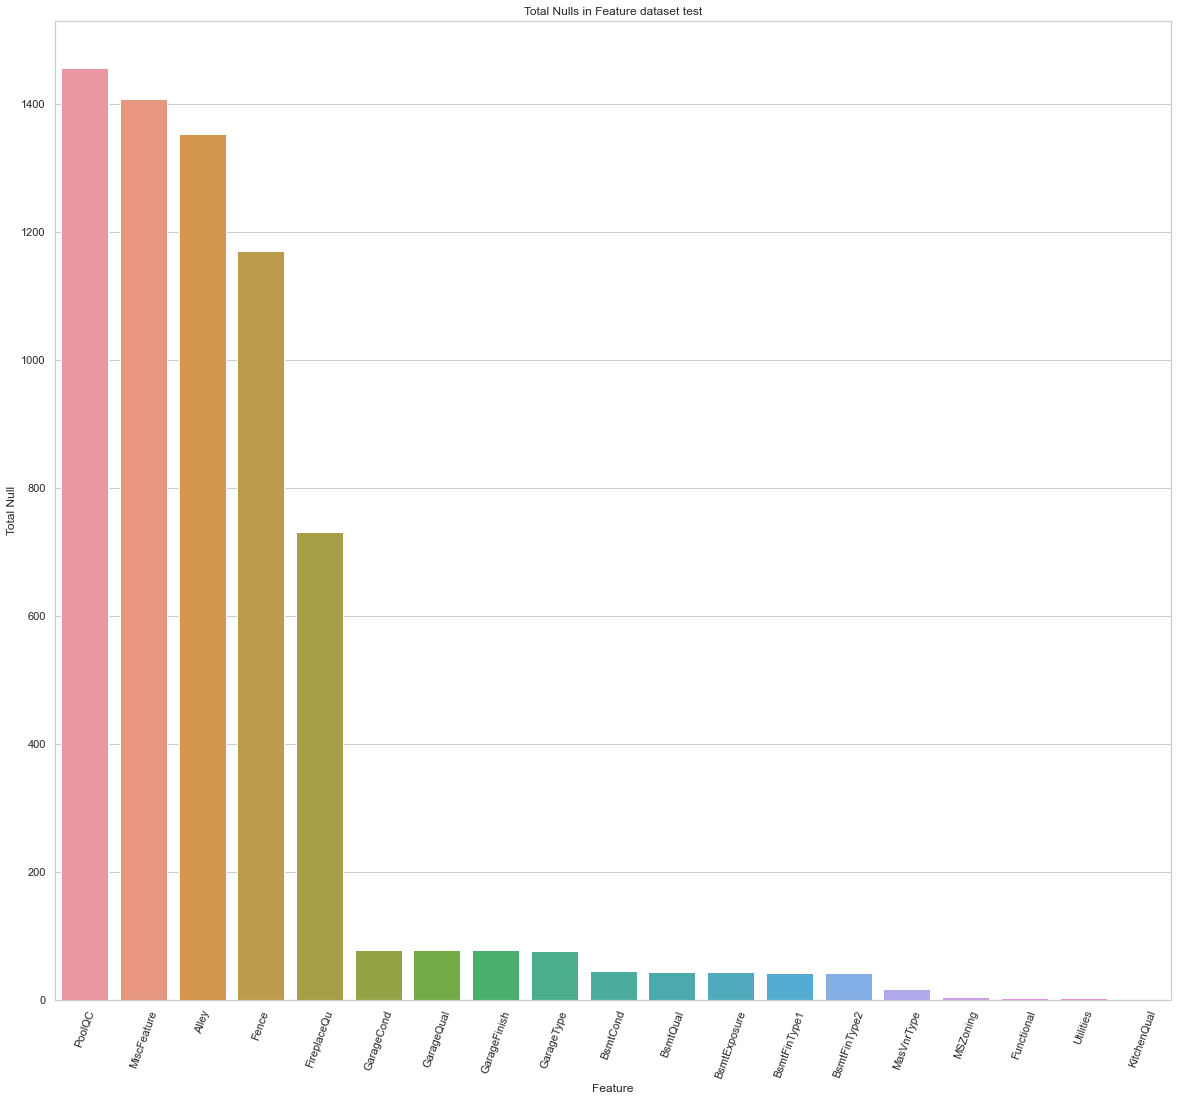

In [124]:
null_list = []
for col in df_test_cat.columns:
    null = df_test_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 
print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
sns.set_palette(sns.color_palette("tab10"))
sns.barplot(data=null_df.sort_values(by='Total Null',ascending = False).head(19), x='Feature',y='Total Null')
plt.xticks(rotation = 70)
plt.title("Total Nulls in Feature dataset test")
plt.show()

<h3>2-4 Remove columns with more than 200 nulls in train and test dataset</h3>

In [125]:
col_with_null=[]
for col in df_train_cat.columns:
    
    if df_train_cat[col].isnull().sum()> 150:
        col_with_null.append(col)
        df_train_cat.drop([col], axis = 1, inplace = True)
        df_test_cat.drop([col], axis = 1, inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h3> 2 - 5 Display of test and train dataset after removing nulls</h3>

Total columns with null:
17
Total null values:
555


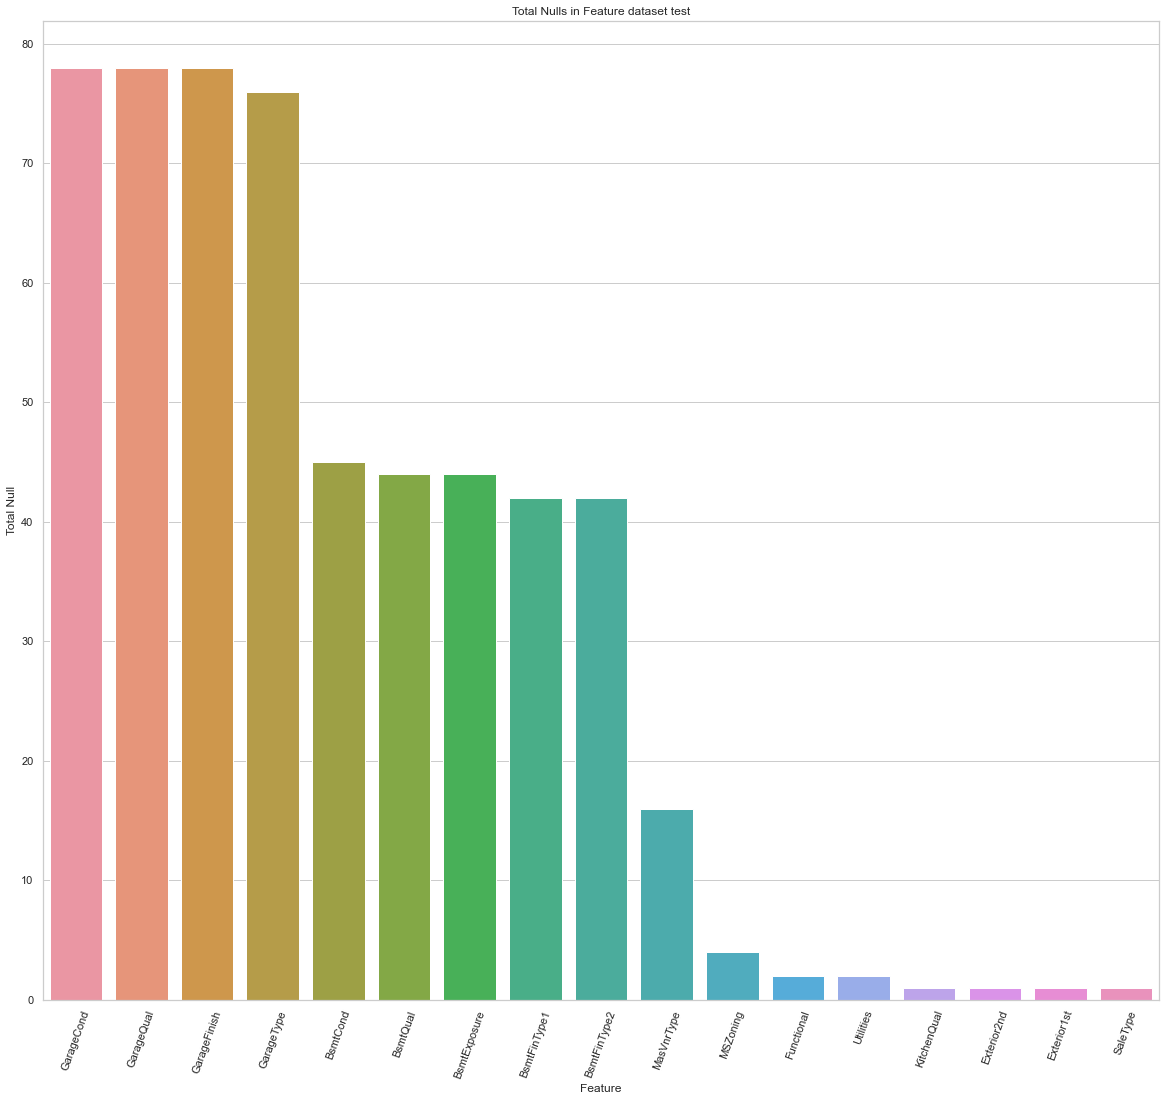

In [126]:
null_list = []
for col in df_test_cat.columns:
    null = df_test_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 
print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
sns.set_palette(sns.color_palette("tab10"))
sns.barplot(data=null_df.sort_values(by='Total Null',ascending = False).head(19), x='Feature',y='Total Null')
plt.xticks(rotation = 70)
plt.title("Total Nulls in Feature dataset test")
plt.show()

Total columns with null:
11
Total null values:
520


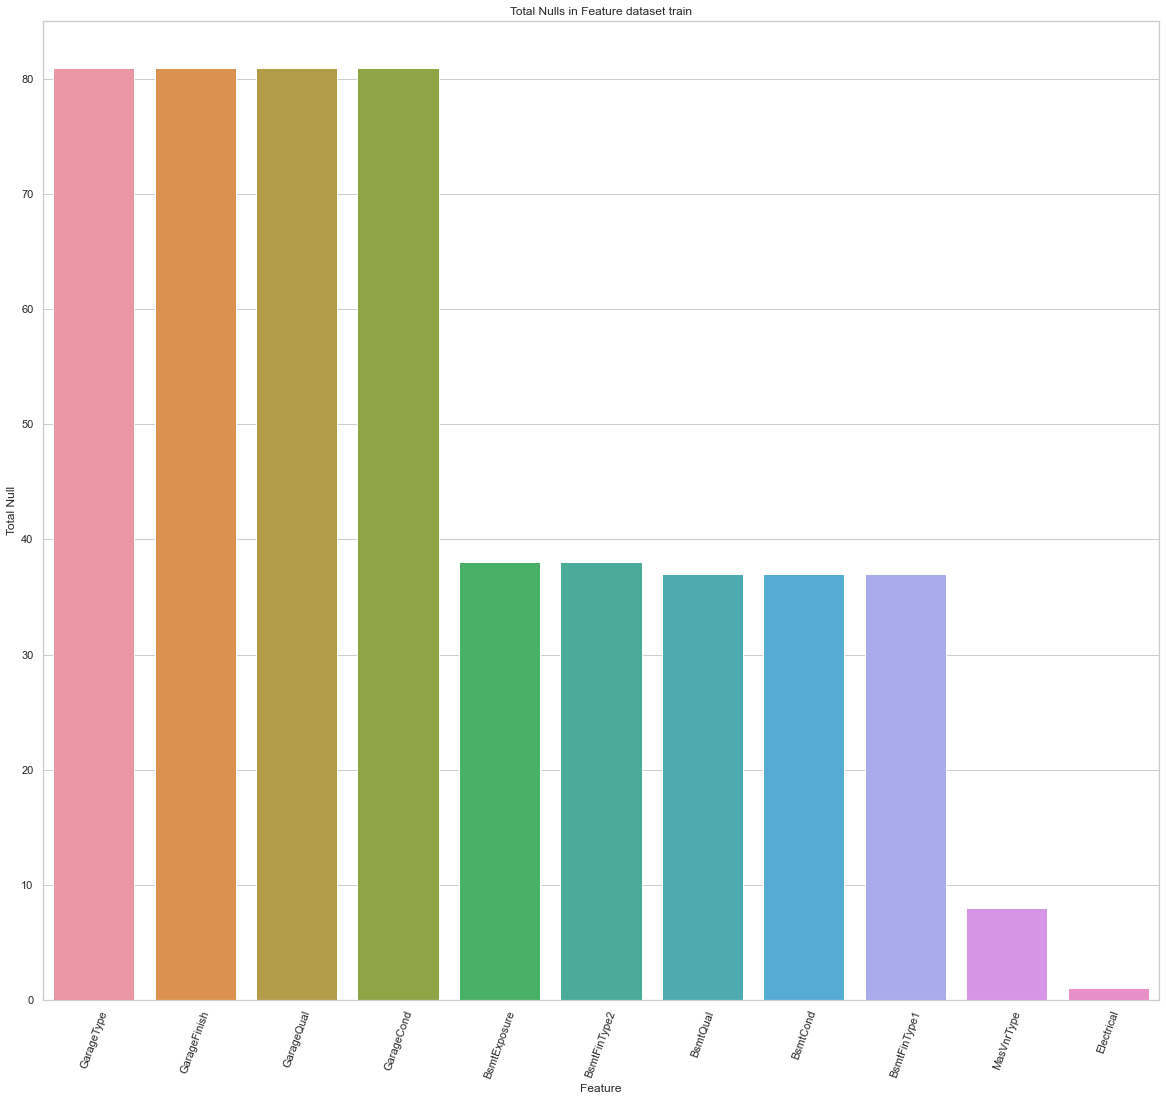

In [127]:
null_list = []
for col in df_train_cat.columns:
    null = df_train_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 
print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
sns.set_palette(sns.color_palette("tab10"))
sns.barplot(data=null_df.sort_values(by='Total Null',ascending = False).head(19), x='Feature',y='Total Null')
plt.xticks(rotation = 70)
plt.title("Total Nulls in Feature dataset train")
plt.show()

Imputation of missing value in test and train dataset

In [128]:

# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="most_frequent")
#train
df_train_imputed_cat = pd.DataFrame(my_imputer.fit_transform(df_train_cat))
df_train_imputed_cat.columns = df_train_cat.columns
# test
df_test_imputed_cat = pd.DataFrame(my_imputer.fit_transform(df_test_cat))
df_test_imputed_cat.columns = df_test_cat.columns 

In [129]:
for k in df_train_imputed_cat:
    print(df_train_imputed_cat[k].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

# After cleaning:
    

In [130]:
# train
null_list = []

for col in df_train_imputed_cat.columns:
    null = df_train_imputed_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
        
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 



print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
print("Total columns:")
df_train_imputed_cat.shape

Total columns with null:
0
Total null values:
0
Total columns:


(1460, 38)

In [131]:
# test
null_list = []

for col in df_test_imputed_cat.columns:
    null = df_test_imputed_cat[col].isnull().sum()
    if null != 0 :
        null_list.append([col,null])
        
null_df = pd.DataFrame(null_list,columns=['Feature','Null'])
null_df.set_index('Feature')
null_df['Total Null'] = null_df['Null'] 



print("Total columns with null:")
print(len(null_df))
print("Total null values:")
print(null_df['Total Null'].sum(axis=0))
print("Total columns:")
df_test_imputed_cat.shape

Total columns with null:
0
Total null values:
0
Total columns:


(1459, 38)

# 2 - 6 encoding

In [132]:
for c in df_train_imputed_cat:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train_imputed_cat[c].values)) 
    df_train_imputed_cat[c] = lbl.transform(list(df_train_imputed_cat[c].values))
    
for c in df_test_imputed_cat: 
    lbl.fit(list(df_test_imputed_cat[c].values)) 
    df_test_imputed_cat[c] = lbl.transform(list(df_test_imputed_cat[c].values))

In [133]:
df_train_imputed_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [134]:
df_train_imputed_cat.dtypes

MSZoning         int32
Street           int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
KitchenQual      int32
Functional       int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
SaleType         int32
SaleCondition    int32
dtype: object


 <h2 style= 'color: red'>3- Join categorical features and numreical features</h2>

In [135]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_imputed_cat)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = pd.DataFrame(df_test_imputed).join(df_test_imputed_cat)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 55)
Test set: (1459, 54)


 # 3-1 drop quasi-constant features where 70% of the values are similar or constant

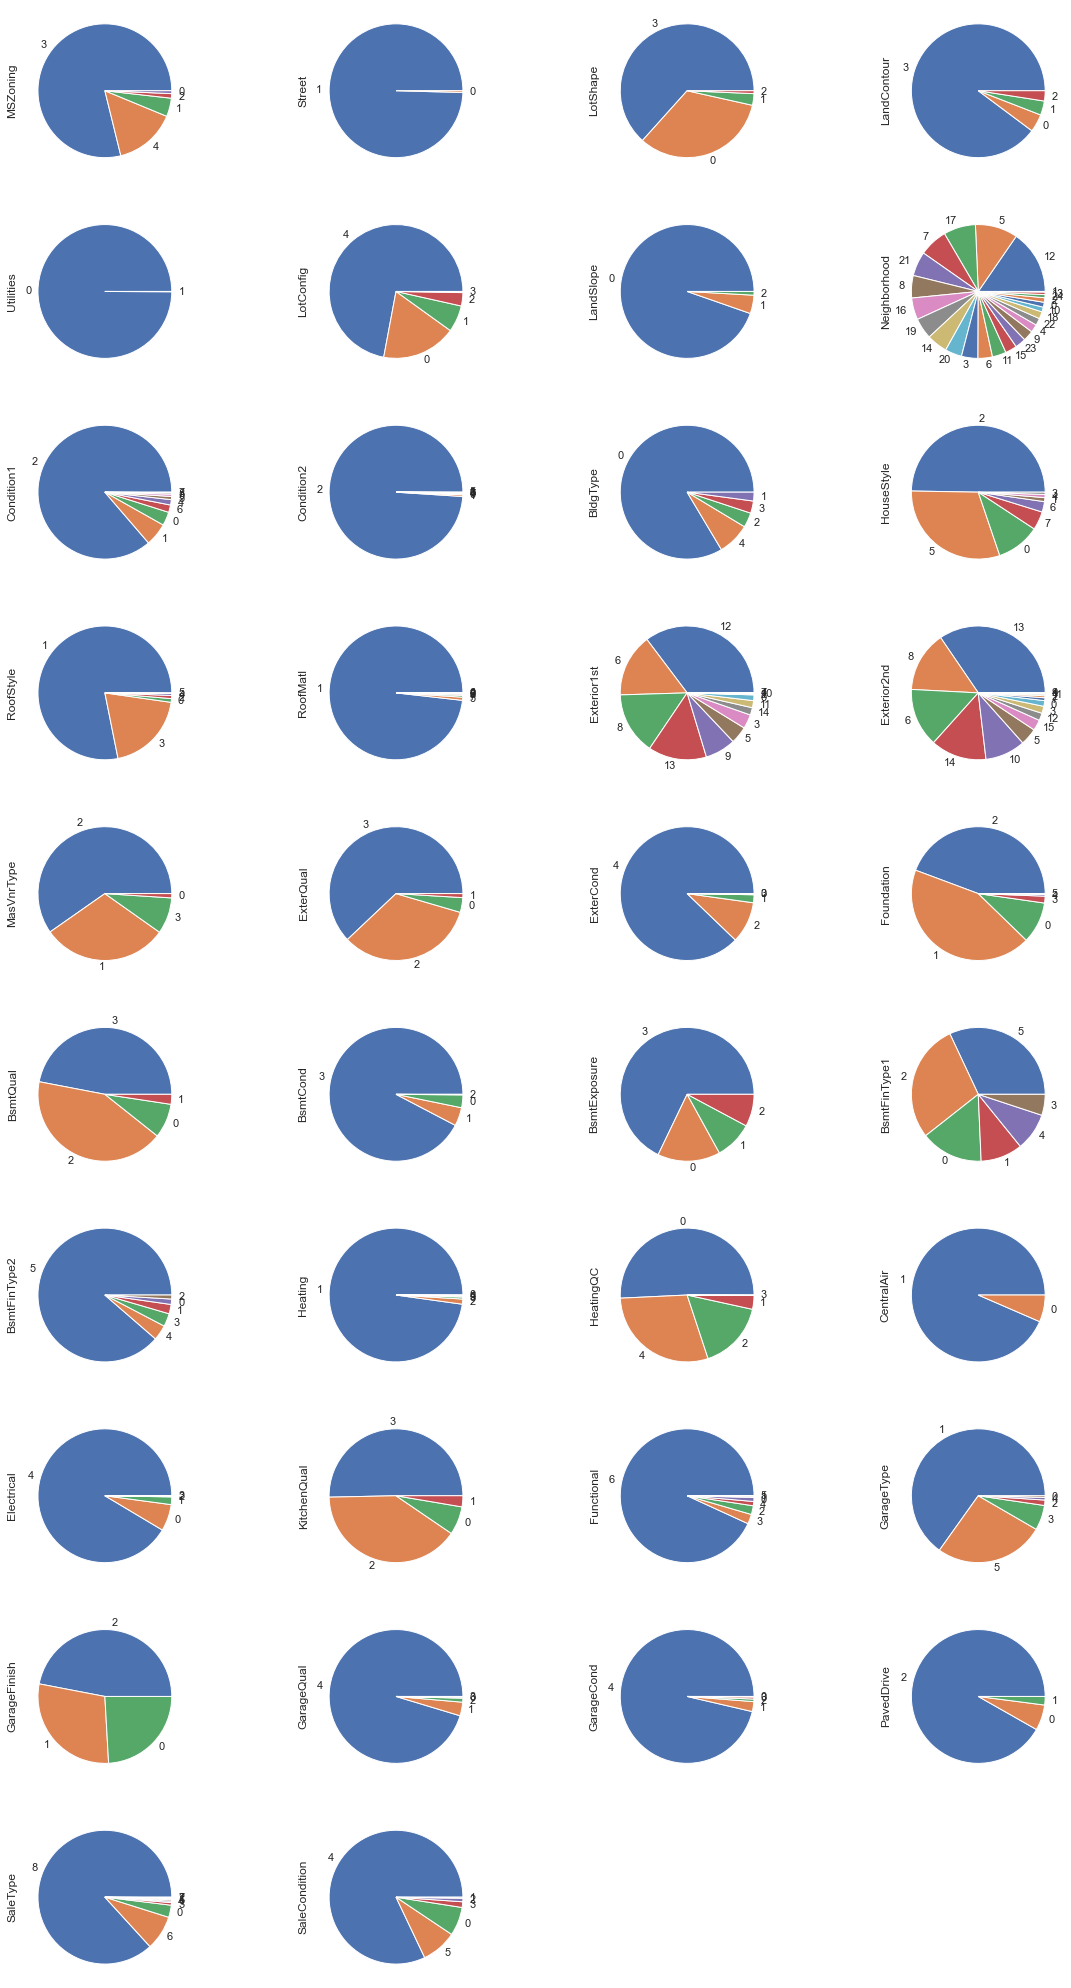

In [136]:
sns.set_theme()
fig=plt.figure(figsize=(20,40))
for i in range(len((df_train_new.select_dtypes(include='int')).columns)):
    fig.add_subplot(11,4,i+1)
    df_train_new.select_dtypes(include='int').iloc[:,i].value_counts().plot(kind="pie", subplots=True)

In [137]:
# Let's drop quasi-constant features where 70% of the values are similar or constant
sel = VarianceThreshold(threshold=0.3) # 0.05: drop column where 70% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_new.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(
    f"\nNumber of quasi_constant features: {len(df_train_new.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_new.iloc[:, :-
                                                             1].columns if x not in df_train_new.iloc[:, :-1].columns[sel.get_support()]]

print(
    f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


# Let's drop these columns from df_train_new and df_train_new
df_train_new.drop(quasi_constant_features_list, axis=1, inplace=True)
df_test_new.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 46

Number of quasi_constant features: 8

Quasi-constant features to be dropped: ['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir', 'GarageCond', 'PavedDrive']


# after droping

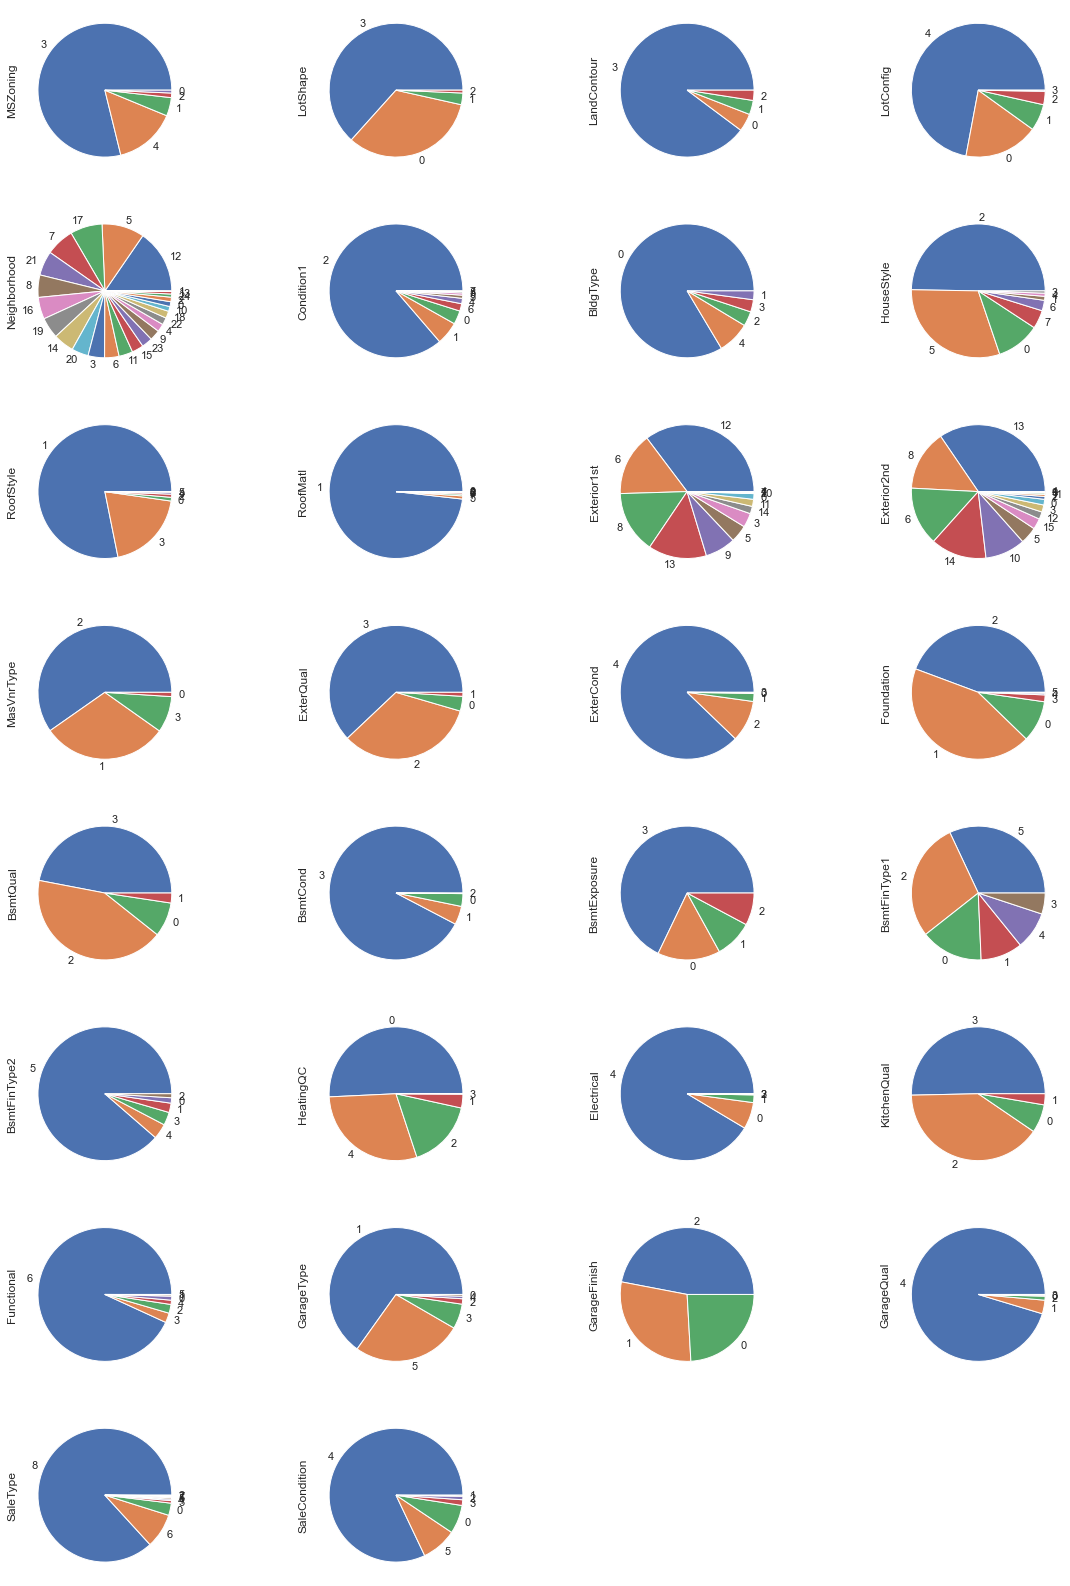

In [138]:
sns.set_theme()
fig=plt.figure(figsize=(20,40))
for i in range(len((df_train_new.select_dtypes(include='int')).columns)):
    fig.add_subplot(11,4,i+1)
    df_train_new.select_dtypes(include='int').iloc[:,i].value_counts().plot(kind="pie", subplots=True)

# 3-2 Join training dataset and test dataset

In [139]:
data = pd.concat([df_train_new,df_test_new])
data.isnull().sum().sum()

48163

# 3-3 Inspect Target Feature (SalePrice)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


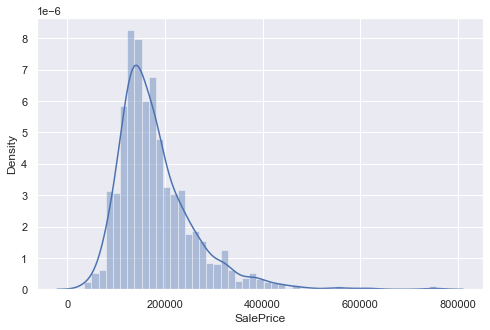

In [140]:
plt.figure(figsize=(8,5))
sns.distplot(df_train_new["SalePrice"])
plt.show()

We can see the distribution of the target variable is skewed. Many linear models assume the data is normally distributed. Skewed distribution would also make it difficult to interpret the model's coefficients. And it often leads to problems such as overfitting. To avoid such issues later in the process, we will normally distribute our target variable.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


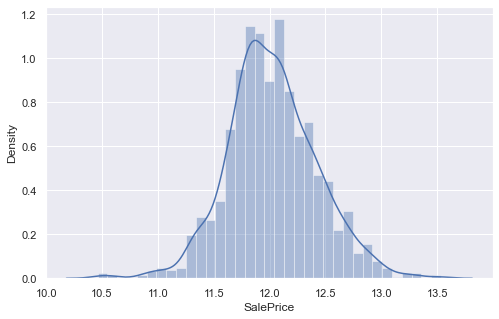

In [141]:
df_train_new["SalePrice"]=df_train_new["SalePrice"].apply(np.log)
plt.figure(figsize=(8,5))
sns.distplot(df_train_new["SalePrice"])
plt.show()

NOTE : we sould apply exp after modeling

Distribution of target feature looks normal now. So we are good to proceed further.


 <h1 style= 'color: green'>IV- Preparing data for medeling</h1>

In [142]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePrice"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePrice"]
print(y.shape)
print(y)

(1460, 46)
(1460,)
0      12.25
1      12.11
2      12.32
3      11.85
4      12.43
        ... 
1455   12.07
1456   12.25
1457   12.49
1458   11.86
1459   11.90
Name: SalePrice, Length: 1460, dtype: float64


In [143]:
# split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1168, 46)
y_train:(1168,)

X_test:(292, 46)
y_test:(292,)


In [144]:
# list ereur and score and algorithm
model_list = []
MAE_list = []
MSE_list = []
RMSE_list = []
r2_score_list = []

 <h1 style= 'color: green'>V- Modeling</h1>

# 1- Random forestRegressor

In [145]:
RandomForest = RandomForestRegressor(n_estimators = 400,min_samples_split = 2,min_samples_leaf = 1,max_features= 'sqrt',max_depth =None,bootstrap= False)
model_list.append(RandomForest.__class__.__name__)
RandomForest.fit(X_train, y_train)
predictions = RandomForest.predict(X_test)
#predictions


In [146]:
predictions.shape

(292,)

In [147]:
y_test.shape

(292,)

### Score of Random forestRegressor

In [148]:
print("R2 score", r2_score(y_test, predictions))
r2_score_list.append(r2_score(y_test, predictions))

R2 score 0.8621215114367127


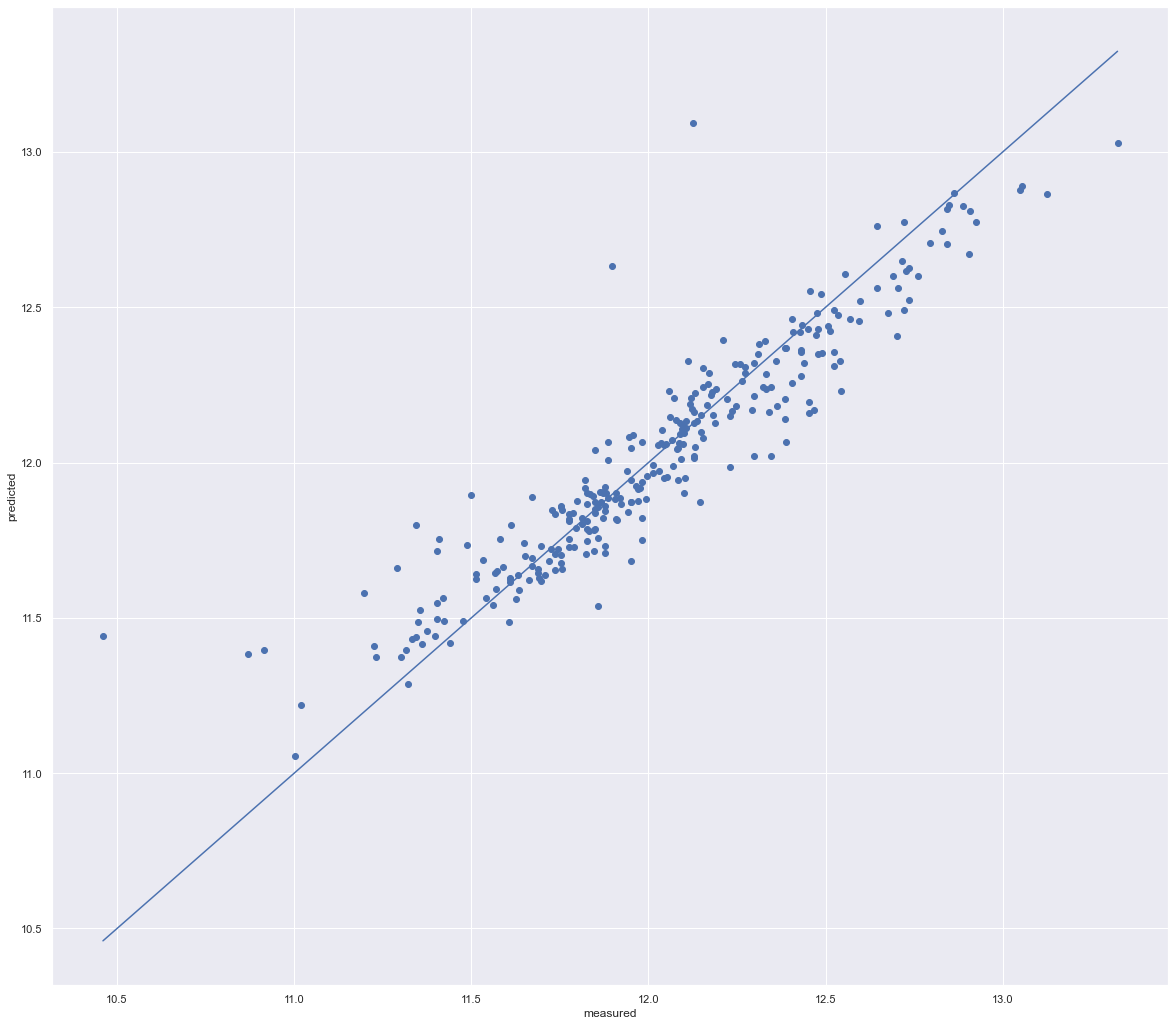

In [149]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(),
         y_test.max()],
        [y_test.min(),y_test.max()])
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [150]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
MAE_list.append(metrics.mean_absolute_error(y_test, predictions))
MSE_list.append(metrics.mean_squared_error(y_test, predictions))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.10479426799413877
Mean Squared Error: 0.025499896257512766
Root Mean Squared Error: 0.15968686939605511


In [151]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(10)

,Actual,Predicted
1015,12.33,12.24
1316,12.60,12.52
1193,12.01,11.99
587,11.83,11.79
494,11.42,11.49
1311,12.22,12.20
596,11.65,11.74
1147,12.07,11.99
367,12.01,11.97
551,11.63,11.64


#  2- Regression linear 

In [152]:
# regression linear 
regressor = LinearRegression()
model_list.append(regressor.__class__.__name__)
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

11.887799576510844
[ 1.17155520e-01  3.18550383e-02  4.20890264e-02  3.04135476e-03
  9.66509531e-03  1.06275517e-01  6.91776117e-03  1.22444319e-02
  4.82452095e-02  1.75556827e-03  5.67219439e-03  1.10010122e-02
 -4.89205711e-03  2.79914664e-02  1.17781670e-02  9.67929212e-03
 -3.40197848e-03 -5.35118541e-03 -2.00750538e-03  5.54208872e-04
  1.18016186e-03  9.99388720e-04 -2.71541614e-02 -6.98482367e-03
  5.30339614e-03  1.53081888e-02 -6.18194963e-03  2.82527631e-03
 -5.93522504e-04  1.14923149e-02  1.19426755e-02 -5.66308543e-03
 -2.18303795e-02  1.73979751e-02 -1.17842772e-02 -1.70242955e-02
 -1.00303131e-02 -1.02816426e-02  4.46725616e-03 -1.81183121e-02
  2.68217351e-02 -4.52965097e-03 -8.09168475e-03  1.58133475e-02
 -1.02617221e-04  2.35900002e-02]


In [153]:
#prediction
y_pred = regressor.predict(X_test)

### Score of Regresssion linear

In [154]:
# score
print("R2 score", r2_score(y_test, y_pred))
r2_score_list.append(r2_score(y_test, y_pred))

R2 score 0.830168660766883


In [155]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(20)

,Actual,Predicted
1015,12.33,12.29
1316,12.60,12.54
1193,12.01,12.05
587,11.83,11.80
494,11.42,11.66
1311,12.22,12.23
596,11.65,11.75
1147,12.07,11.94
367,12.01,12.02
551,11.63,11.63


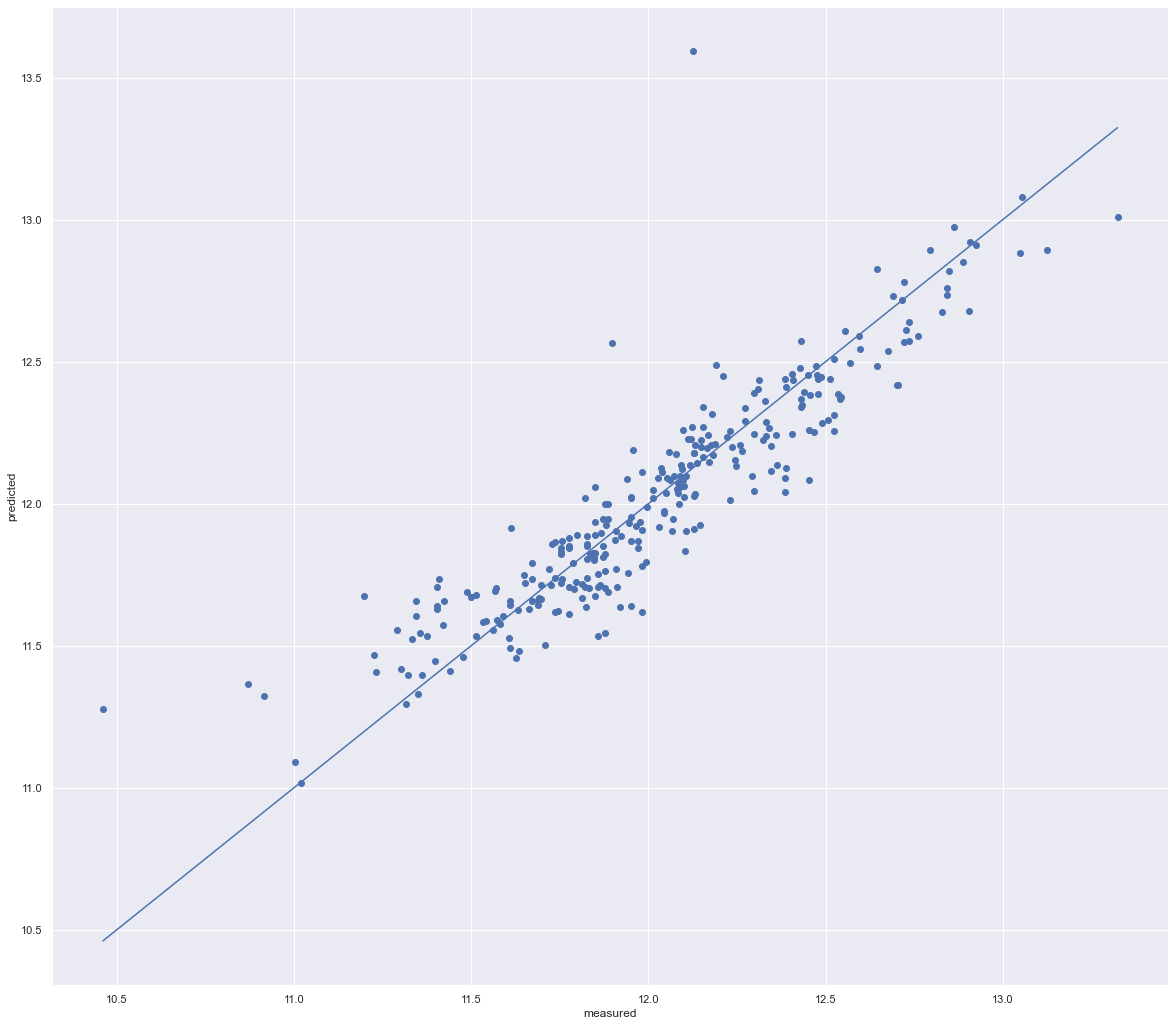

In [156]:
# ploting
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(),
         y_test.max()],
        [y_test.min(),y_test.max()])
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [157]:
# Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
MAE_list.append(metrics.mean_absolute_error(y_test, y_pred))
MSE_list.append(metrics.mean_squared_error(y_test, y_pred))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11824403342146093
Mean Squared Error: 0.031409406767112354
Root Mean Squared Error: 0.17722699220805038


# 3- Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [158]:
#Lasso Regression

#Initializing the Lasso Regressor
lasso_reg = Lasso(alpha=0.001)
model_list.append(lasso_reg.__class__.__name__)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)

### Score of lasso Regressor

In [159]:
print("R2 score", r2_score(y_test, y_pred_lass))
r2_score_list.append(r2_score(y_test, y_pred_lass))

R2 score 0.8320596163662304


In [160]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lass})
df.head(10)

,Actual,Predicted
1015,12.33,12.29
1316,12.60,12.53
1193,12.01,12.03
587,11.83,11.80
494,11.42,11.66
1311,12.22,12.23
596,11.65,11.75
1147,12.07,11.94
367,12.01,12.01
551,11.63,11.63


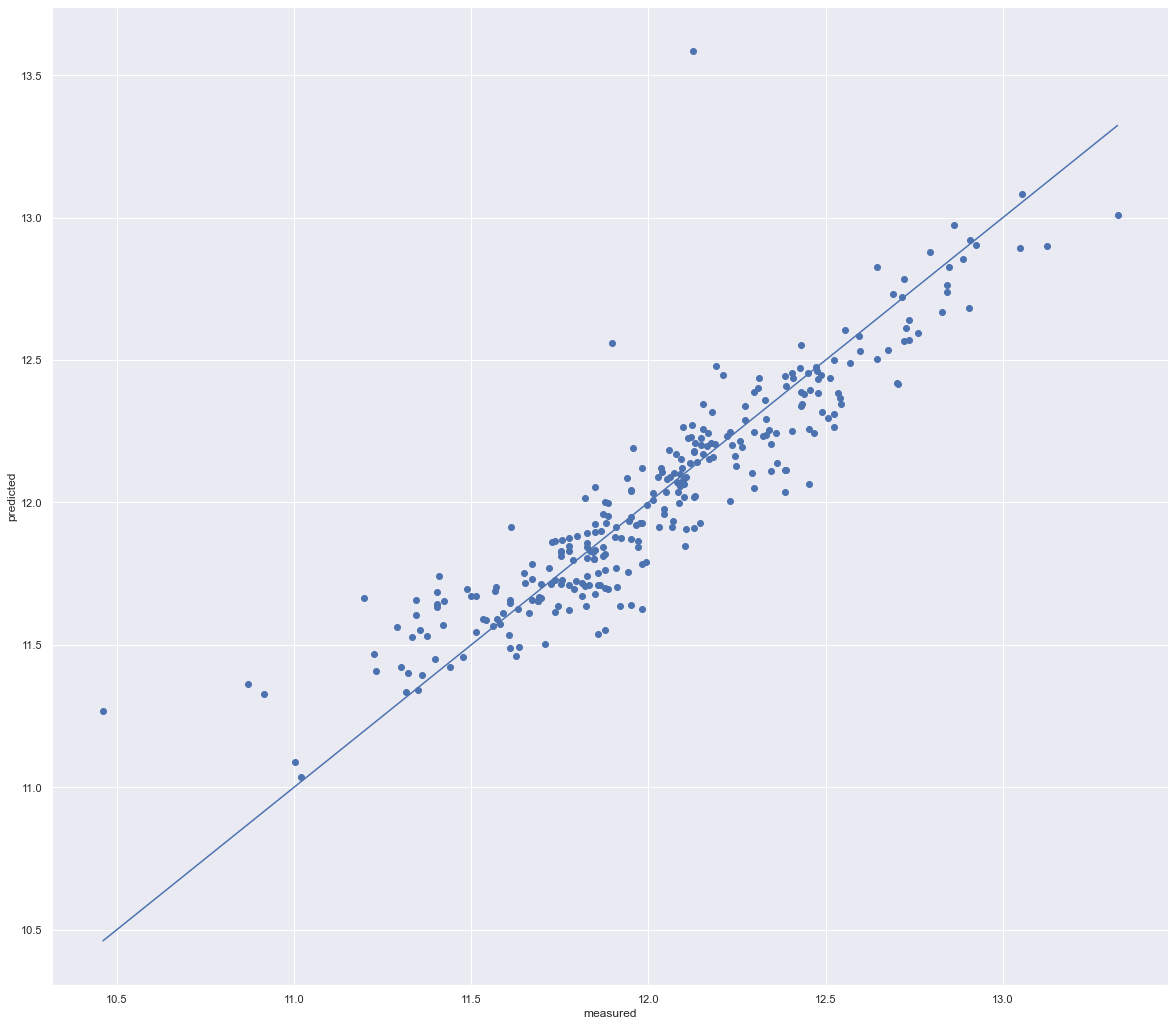

In [161]:
#plotting
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lass)
ax.plot([y_test.min(),
         y_test.max()],
        [y_test.min(),y_test.max()])
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [162]:
# error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lass))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lass))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lass)))
MAE_list.append(metrics.mean_absolute_error(y_test, y_pred_lass))
MSE_list.append(metrics.mean_squared_error(y_test, y_pred_lass))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lass)))

Mean Absolute Error: 0.11779974220181104
Mean Squared Error: 0.03105968454348364
Root Mean Squared Error: 0.17623757982758287


# 4- XGB Regressor

In [163]:
#XGB
xgbr = xgb.XGBRegressor()
model_list.append(xgbr.__class__.__name__)
xgbr.fit(X_train, y_train)
#Predicting for X_test
predict_xgb = xgbr.predict(X_test)

### Score of XGB Regressor

In [164]:
print("R2 score", r2_score(y_test, predict_xgb))
r2_score_list.append(r2_score(y_test,predict_xgb))

R2 score 0.8535500955958931


In [165]:
#error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
MAE_list.append(metrics.mean_absolute_error(y_test, predict_xgb))
MSE_list.append(metrics.mean_squared_error(y_test, predict_xgb))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))

Mean Absolute Error: 0.11305117811198487
Mean Squared Error: 0.027085134223191323
Root Mean Squared Error: 0.16457561855630778


In [166]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_xgb})
df.head(10)

,Actual,Predicted
1015,12.33,12.31
1316,12.60,12.44
1193,12.01,12.01
587,11.83,11.80
494,11.42,11.52
1311,12.22,12.26
596,11.65,11.74
1147,12.07,12.15
367,12.01,12.12
551,11.63,11.67


# 5- SVR :Support Vector Regression

In [167]:
regressor = SVR(kernel = 'rbf')
model_list.append(regressor.__class__.__name__)
regressor.fit(X_train, y_train)

SVR()

In [168]:
predict_SVR = regressor.predict(X_test)

### Score of SVR

In [169]:
print("R2 score", r2_score(y_test, predict_SVR))
r2_score_list.append(r2_score(y_test, predict_SVR))

R2 score 0.8602246866148542


In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_SVR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_SVR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_SVR)))
MAE_list.append(metrics.mean_absolute_error(y_test, predict_SVR))
MSE_list.append(metrics.mean_squared_error(y_test, predict_SVR))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, predict_SVR)))

Mean Absolute Error: 0.10518142708426007
Mean Squared Error: 0.02585070396276162
Root Mean Squared Error: 0.16078154111328086


In [171]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_SVR})
df.head(10)

,Actual,Predicted
1015,12.33,12.27
1316,12.60,12.46
1193,12.01,12.06
587,11.83,11.80
494,11.42,11.57
1311,12.22,12.22
596,11.65,11.79
1147,12.07,11.98
367,12.01,12.04
551,11.63,11.67


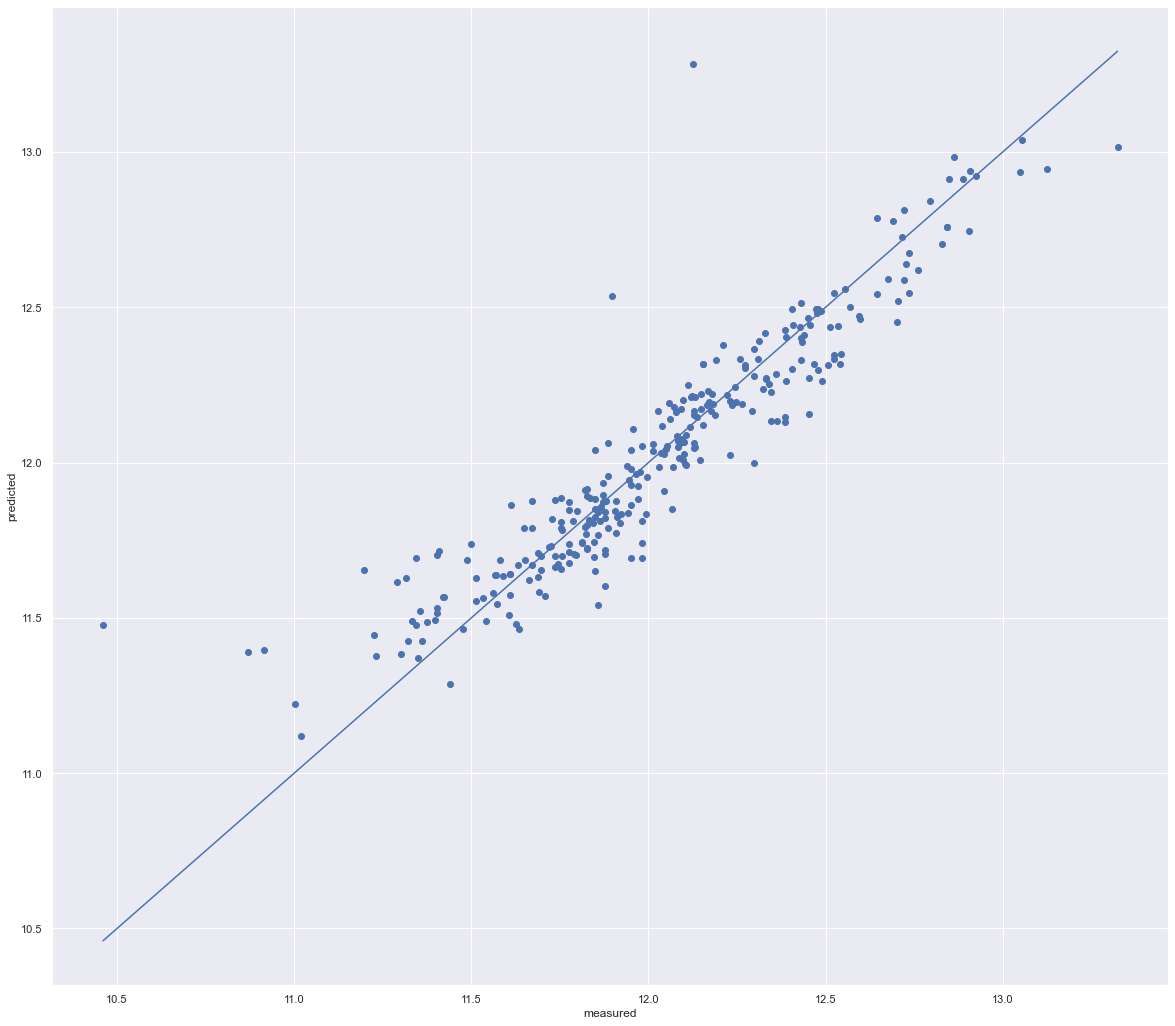

In [172]:
# ploting
fig, ax = plt.subplots()
ax.scatter(y_test, predict_SVR)
ax.plot([y_test.min(),
         y_test.max()],
        [y_test.min(),y_test.max()])
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [173]:
RMSE_list

[0.15968686939605511,
 0.17722699220805038,
 0.17623757982758287,
 0.16457561855630778,
 0.16078154111328086]

In [174]:
MSE_list

[0.025499896257512766,
 0.031409406767112354,
 0.03105968454348364,
 0.027085134223191323,
 0.02585070396276162]

In [175]:
model_list

['RandomForestRegressor', 'LinearRegression', 'Lasso', 'XGBRegressor', 'SVR']

In [176]:
MAE_list

[0.10479426799413877,
 0.11824403342146093,
 0.11779974220181104,
 0.11305117811198487,
 0.10518142708426007]

In [177]:
r2_score_list

[0.8621215114367127,
 0.830168660766883,
 0.8320596163662304,
 0.8535500955958931,
 0.8602246866148542]

 <h1 style= 'color: green'>VI-  Choosing the best model</h1>

In [178]:
# Create a table with pd.DataFrame for all results
model_results = pd.DataFrame({"Model": model_list,
                              "MAE": MAE_list,
                             "MSE": MSE_list,
                             "RMSE": RMSE_list,
                             "R2_score":r2_score_list})

model_results

,Model,MAE,MSE,RMSE,R2_score
0,RandomForestRegressor,0.10,0.03,0.16,0.86
1,LinearRegression,0.12,0.03,0.18,0.83
2,Lasso,0.12,0.03,0.18,0.83
3,XGBRegressor,0.11,0.03,0.16,0.85
4,SVR,0.11,0.03,0.16,0.86


# Note: we will choose SVR because the error is small and R2_score is the largest


  <h1 style= 'color: green'>VII-  verification of existance of overfiting or underfiting</h1>

In [179]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        # Create a  DecisionTreeRegressor
        regressor = DecisionTreeRegressor(max_depth = depth)
       
        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

C:\Users\Dell\AppData\Local\Temp/ipykernel_13632/1089473562.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


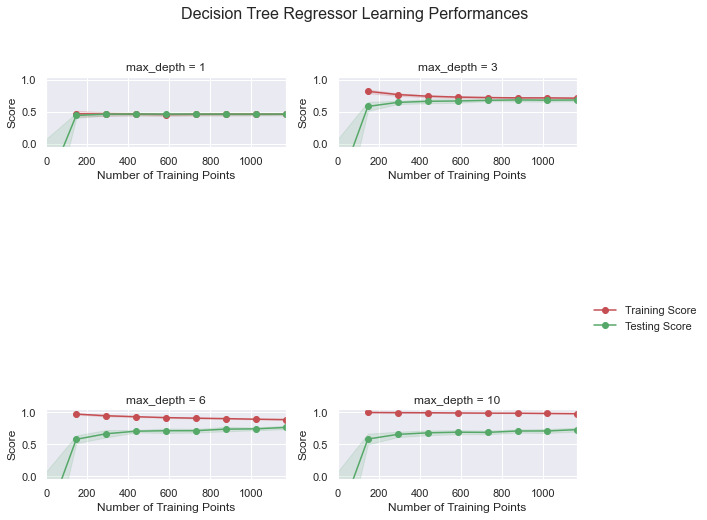

In [180]:
ModelLearning(X, y)

Note : we notice that there is no overfitting or underfitting


 <h1 style= 'color: green'>VIII-  Submission</h1>

In [181]:
predict_SVR.shape

(292,)

In [182]:
len(Id_test_list)

1459

In [183]:
df_test_new.shape

(1459, 46)

### apply exp to SalePrice

In [184]:
#predict = regressor.predict(X_test)
# predict
# We take antilog i.e. np.exp to convert log predictions to actual prices.
predict = np.exp(regressor.predict(df_test_new))
#predict=scaler.inverse_transform(regressor.predict(X_test))
#print(regressor.predict(X_test))

In [185]:
submission = pd.DataFrame({"Id": Id_test_list,
                       "SalePrice": predict})
submission.head(10)


,Id,SalePrice
0,1461,"115,175.66"
1,1462,"157,814.56"
2,1463,"185,018.50"
3,1464,"197,835.84"
4,1465,"181,602.93"
5,1466,"176,459.84"
6,1467,"177,309.70"
7,1468,"168,646.65"
8,1469,"188,777.08"
9,1470,"122,611.41"


In [186]:
submission.to_csv("submission.csv", index=False)

In [187]:

file = 'model.sav'
joblib.dump(xgbr, file)

['model.sav']